In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
tickers = ['PG', 'MSFT', 'F', 'GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6065 entries, 1995-01-03 to 2019-02-05
Data columns (total 4 columns):
PG      6065 non-null float64
MSFT    6065 non-null float64
F       6065 non-null float64
GE      6065 non-null float64
dtypes: float64(4)
memory usage: 236.9 KB


In [4]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,6.528558,2.729909,3.471492,2.975797
1995-01-04,6.476228,2.749754,3.564892,2.975797
1995-01-05,6.384644,2.704397,3.533757,2.983092
1995-01-06,6.397724,2.749754,3.533757,2.968507
1995-01-09,6.371559,2.732745,3.596028,2.939330


In [5]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2019-01-29,93.540001,102.940002,8.610001,8.900
2019-01-30,94.519997,106.379997,8.710000,9.100
2019-01-31,96.470001,104.430000,8.800000,10.160
2019-02-01,97.470001,102.779999,8.720000,10.190
2019-02-05,97.839996,106.459900,8.670000,10.295


### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

In [6]:
mydata.iloc[0]

PG      6.528558
MSFT    2.729909
F       3.471492
GE      2.975797
Name: 1995-01-03 00:00:00, dtype: float64

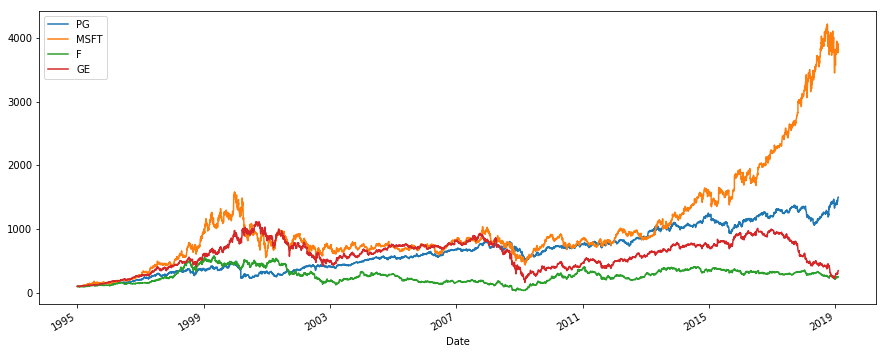

In [7]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

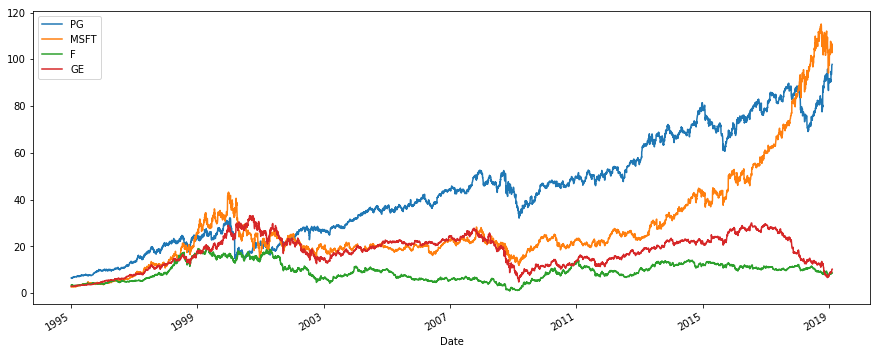

In [8]:
mydata.plot(figsize=(15,6))
plt.show()

In [9]:
mydata.loc['1995-01-03']

PG      6.528558
MSFT    2.729909
F       3.471492
GE      2.975797
Name: 1995-01-03 00:00:00, dtype: float64

In [10]:
mydata.iloc[0]

PG      6.528558
MSFT    2.729909
F       3.471492
GE      2.975797
Name: 1995-01-03 00:00:00, dtype: float64

## Calculating the Return of a Portfolio of Securities

In [11]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008015,0.007269,0.026905,0.000000
1995-01-05,-0.014142,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016771,0.000000,-0.004889
1995-01-09,-0.004090,-0.006186,0.017622,-0.009829


In [12]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [13]:
np.dot(returns, weights)

array([        nan,  0.0065397 , -0.0092297 , ...,  0.03227913,
       -0.00289308,  0.01104249])

***

In [14]:
annual_returns = returns.mean() * 250
annual_returns

PG      0.136676
MSFT    0.200533
F       0.116044
GE      0.095744
dtype: float64

In [15]:
np.dot(annual_returns, weights)

0.1372491635346996

In [16]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print pfolio_1

13.725 %


***

In [17]:
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [18]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 5) * 100) + ' %'
print pfolio_1
print pfolio_2

13.725 %
15.708 %
